In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer 
from LoopStructural.modelling.features import StructuralFrameBuilder

Cannot import Surfe


## Intrusion Frame Description
The intrusion frame is comprise of 3 coordinates:
- Coordinate 0 - Represent the growth of the intrusion. 
               - Measures the distance between the intrusion network and agy points. The unitary vector is normal to the intrusion network surface
- Coordinate 1 - Represent the strike of the intrusion network.
               - The unitary vector is parallel to the strike of the contact.
- Coordinate 2 - Represents the propagation direction of the intrusions. 
               - When the propagation direction is unknown, it is assume to be parallel to the dip of the intrusion network, and it sense is always pointing to higher elevation levels. 

When no coordinate is provided, the function will get one primary coordinate from the intrusion network, and then obtain the other 2.

In this case, the primary coordinate will be related to the intrusion network surface and the unitary vector will be parallel to the gradient of the scalar field of pre-existing units.

A second coordinate will be obtain as the vector resultant from the intersection of the intrusion network and a horizontal surface. Therefore, this coordinate will represent the strike of the intrusion network.

A third coordinate will be obtain as the vector orthogonal to the other two. 

### Intrusion functions
#### def create_intrusion_network(self, intrusion_x):
    Step 1 of the ODSIM
    
    Parameters:
    - self = model (data)
    - intrusion_x = string, refers to points showing intrusion contact
------
    Returns:
    - dataframe with 
             - intrusion network points [X,Y,Z,val=0,coord=0]
             - contact points used to create the intrusion network ('inet contact') [X,Y,Z,gx,gy,gz]
             - unused ('other contact') [X,Y,Z,gx,gy,gz]
     
     The data must contain indication of different segments of intrusions, classified accordins contact and if it is roof/floor
     [x , y , z , inet/contact , roof/floor , scalar field value] 


In [2]:
# Generate dataframe representing the outcome of Step1

# intrusion network points [x,y,z, coord=0, val=0]
inet_points = pd.read_csv('C:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_3_Step1_InetGrads.csv')
# contact points [x,y,z,gx,gy,gz,feature, contact_type]
contact_points = pd.read_csv('C:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_3_Step1_ObsPoints.csv')
step1_data = pd.concat([contact_points, inet_points], sort=False, ignore_index = True)
step1_data = step1_data.drop(['Unnamed: 0'], axis = 1)
step1_data.head()

,X,Y,Z,gx,gy,gz,step1_datatype,contact_type,val,Unnamed: 8
0,3.46,0.09,5.19,-0.43,0.04,0.90,inet contact,roof,NaN,NaN
1,2.16,9.88,5.05,-0.17,-0.01,0.99,inet contact,roof,NaN,NaN
2,1.15,7.92,5.25,0.01,-0.01,1.00,inet contact,roof,NaN,NaN
3,0.98,5.39,4.87,0.02,-0.02,1.00,inet contact,roof,NaN,NaN
4,6.58,2.16,8.09,-0.48,-0.02,0.88,inet contact,roof,NaN,NaN


### Generate data from intrusion frame

#### Coordinate 0

In [3]:
# Intrusion network points
# values
inet_data_val = inet_points.drop(['gx','gy','gz'], axis = 1)
inet_data_val['val'] = 0
inet_data_val['coord'] = 0

# gradients
inet_data_grads = inet_points
inet_data_grads = inet_data_grads.drop(['val'], axis = 1)
inet_data_grads['coord'] = 0

In [4]:
# inet_data_val.head()
# inet_data_grads.head()

In [5]:
# Roof contact points
# values
roof_cp_vals = contact_points.loc[contact_points['step1_datatype'] == 'inet contact']
roof_cp_vals = roof_cp_vals.drop(['gx','gy','gz'], axis = 1)
roof_cp_vals['val'] = 0
roof_cp_vals['coord'] = 0

#gradients
roof_cp_grads = contact_points.loc[contact_points['step1_datatype'] == 'inet contact']
roof_cp_grads['coord'] = 0

C:\Users\falv0002\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
# roof_cp_grads.head()
# roof_cp_vals.head()

In [7]:
# Floor contact points
# Values
floor_cp_vals = contact_points.loc[contact_points['step1_datatype'] == 'other contact']
floor_cp_vals = floor_cp_vals.drop(['gx','gy','gz'], axis = 1)
floor_cp_vals['val'] = -3
floor_cp_vals['coord'] = 0

#gradients
floor_cp_grads = contact_points.loc[contact_points['step1_datatype'] == 'other contact']
floor_cp_grads['coord'] = 0

C:\Users\falv0002\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
# floor_cp_grads.head()
# floor_cp_vals.head()

In [9]:
# all data
# coord_0_data = pd.concat([inet_data_grads,inet_data_val,roof_cp_grads,roof_cp_vals,floor_cp_grads,floor_cp_vals], sort=False, ignore_index = True)
# no inet grads
coord_0_data = pd.concat([inet_data_val,roof_cp_grads,roof_cp_vals,floor_cp_grads,floor_cp_vals], sort=False, ignore_index = True)

#### Coordinates 1 and 2

In [10]:
# add another two coords
coord_1_data = pd.DataFrame(columns = ['X','Y','Z','gx','gy','gz','coord','val'])
coord_2_data = pd.DataFrame(columns = ['X','Y','Z','gx','gy','gz','coord','val'])

In [11]:
def strike_vector(surface_gradient):
    #calculates the strike vector of a surface with gradient = surface_gradient
    sox = surface_gradient[1]
    soy = -surface_gradient[0]
    soz = 0
    norm_so = np.linalg.norm(np.array([sox,soy,soz]))
    strike_v = np.array([sox,soy,soz])/norm_so
    
    return strike_v

def dip_vector(surface_gradient):
    #calculates the dip vector of a surface with gradient = surface_gradient
    pox = -surface_gradient[0]*surface_gradient[2]
    poy = -surface_gradient[1]*surface_gradient[2]
    poz = pow(surface_gradient[1],2)+pow(surface_gradient[0],2)
    norm_po = np.linalg.norm(np.array([pox,poy,poz]))
    dip_v = np.array([pox,poy,poz])/norm_po
    
    return dip_v

In [12]:
# add other two coordinates, using contact points
fp = 0
j=0

for i in range(len(roof_cp_grads)):
    # do not consider points where the surface is subhorizontal
    if abs(roof_cp_grads.loc[i,'gx'])>0.5 or abs(roof_cp_grads.loc[i,'gy'])>0.5:
        gradient = np.array([roof_cp_grads.loc[i,'gx'],roof_cp_grads.loc[i,'gy'],roof_cp_grads.loc[i,'gz']])
#         # add ONE point with value data and no gradient
#         if fp==0:
#             coord_1_data.loc[j,['X','Y','Z']] = roof_cp_grads.loc[i,['X','Y','Z']]
#             coord_1_data.loc[j,'val'] = 0
#             coord_2_data.loc[j,['X','Y','Z']] = roof_cp_grads.loc[i,['X','Y','Z']]
#             coord_2_data.loc[j,'val'] = 0
#             j=j+1
        # add gradient points for coordinate 1
        # calculate strike vector     
        strike = strike_vector(gradient)
        # add data to coord 1 df
        coord_1_data.loc[j,['X','Y','Z']] = roof_cp_grads.loc[i,['X','Y','Z']]
        coord_1_data.loc[j,['gx','gy','gz']] = strike
        # add gradient points for coordinate 2
        # calculate dot product btw coord 0 and coord 1
        dip = dip_vector(gradient)
        coord_2_data.loc[j,['X','Y','Z']] = roof_cp_grads.loc[i,['X','Y','Z']]
        coord_2_data.loc[j,['gx','gy','gz']] = dip
        j=j+1
        fp=fp+1
        
        
coord_1_data.loc[len(coord_1_data),['X','Y','Z','val']] = [5,5,5,0]
coord_2_data.loc[len(coord_2_data),['X','Y','Z','val']] = [5,5,5,0]

In [13]:
# add other two coordinates, using inet points
j_1 = len(coord_1_data)
j_2 = len(coord_2_data)

for i in range(len(inet_data_grads)):
    # do not consider points where the surface is subhorizontal
    if abs(inet_data_grads.loc[i,'gx'])>0.5 or abs(inet_data_grads.loc[i,'gy'])>0.5:
        gradient = np.array([inet_data_grads.loc[i,'gx'],inet_data_grads.loc[i,'gy'],inet_data_grads.loc[i,'gz']])
        # add gradient points for coordinate 1
        # calculate strike vector     
        strike = strike_vector(gradient)
        # add data to coord 1 df
        coord_1_data.loc[j_1,['X','Y','Z']] = inet_data_grads.loc[i,['X','Y','Z']]
        coord_1_data.loc[j_1,['gx','gy','gz']] = strike
        j_1=j_1+1
        # add gradient points for coordinate 2
        # calculate dot product btw coord 0 and coord 1
        dip = dip_vector(gradient)
        coord_2_data.loc[j_2,['X','Y','Z']] = inet_data_grads.loc[i,['X','Y','Z']]
        coord_2_data.loc[j_2,['gx','gy','gz']] = dip
        j_2=j_2+1

In [14]:
coord_1_data.loc[:,'coord'] = 1
coord_2_data.loc[:,'coord'] = 2

#### Concatenate all dataframes (Coord 0, coord 1 and coord 2 data)

In [15]:
intrusion_frame_data = pd.concat([coord_0_data,coord_1_data,coord_2_data], sort=False, ignore_index = True)

In [16]:
# clean data frame and ensure data type
intrusion_frame_data = intrusion_frame_data.drop(['step1_datatype', 'contact_type','Unnamed: 0'], axis = 1)
intrusion_frame_data.loc[:,'feature_name'] = 'intrusion'
intrusion_frame_data = intrusion_frame_data.astype({'X': float, 'Y': float,'Z': float,'gx': float,'gy': float, 'gz': float, 'coord': float, 'val': float})
intrusion_frame_data.to_csv('C:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_4IntrusionFrameData.csv')

In [17]:
import math

def thickness(inet_points, points):
    # this functions calculates the thickness of the intrusion at a given point, by computing the minimum distance between that point to the intrusion network
    distance = np.zeros([len(points),1])
    for n in range(len(points)):
        px = points[n,0]
        py = points[n,1]
        pz = points[n,2]
        d=np.zeros([len(inet_points),1])
        for i in range(len(inet_points)):
            pox = inet_points[i,0]
            poy = inet_points[i,1]
            poz = inet_points[i,2]
            d[i] = math.sqrt(pow(px-pox,2)+pow(py-poy,2)+pow(pz-poz,2))
        distance[n,0] = np.min(d)    
        
    return distance

### Test using Structural Frame Builder

#### def create_and_add_intrusion(dataframe, intrusion_network_data):
    Create intrusion frame + step 2, 3 and 4 od ODSIM
    
    Parameters:
    - dataframes = pandas dataframe, outcome of 'create_intrusion_network' function
    - intrusion_contact_data = string, name of the intrusion network data

    Returns:
    - intrusion segment

In [18]:
# Create geological model
lower_extent = np.array([0,0,0])
upper_extent = np.array([10,10,10])
geo_model = GeologicalModel(lower_extent,upper_extent)
geo_model.set_model_data(intrusion_frame_data)

In [19]:
# geo_model.parameters

In [20]:
# intrusion_contact_data is a parameter for the function
intrusion_contact_data = 'intrusion'
renormalise = True
reg=np.array([1,1,0.2])
geo_model.parameters['features'].append({'feature_type': 'intrusion', 'feature_name': intrusion_contact_data})

# create intrusion frame
interpolator = geo_model.get_interpolator()
intrusion_frame_builder = StructuralFrameBuilder(interpolator, name=intrusion_contact_data, regularisation=reg)

# add data
intrusion_frame_data = geo_model.data[geo_model.data['feature_name'] == intrusion_contact_data].copy()
if 'coord' not in intrusion_frame_data:
    intrusion_frame_data['coord'] = 0

vals = intrusion_frame_data['val']
# if only one value --> if len(np.unique(vals[~np.isnan(vals)])) == 1 and renormalise
# if no coord 1 --> if intrusion_frame_data[intrusion_frame_data['coord'] == 1].shape[0] == 0
# if no coord 2 --> if intrusion_frame_data[intrusion_frame_data['coord'] == 2].shape[0] == 0
    
intrusion_frame_builder.add_data_from_data_frame(intrusion_frame_data)

In [21]:
# build the intrusion frame
intrusion_frame = intrusion_frame_builder.build(nelements = 1e3, solver = 'lu',gxxgz = .5, gxxgy = 1, gxygz = 1)
# intrusion_frame = intrusion_frame_builder.build(nelements=3000)
# intrusion_frame = intrusion_frame_builder.build(nelements = 1e3, solver = 'lu')


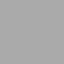

In [22]:
viewer = LavaVuModelViewer(geo_model, background='white')
viewer.add_scalar_field(intrusion_frame[0])
viewer.add_scalar_field(intrusion_frame[1])
viewer.add_scalar_field(intrusion_frame[2])
viewer.add_data(intrusion_frame[0], colour = 'red')
viewer.add_data(intrusion_frame[1], colour = 'blue')
viewer.add_data(intrusion_frame[2], colour = 'pink')

# for i in [-1.5,-1,-.5,0,.5,1,1.5]:
for i in [-1,0,1]:
    viewer.add_isosurface(intrusion_frame[0], isovalue=i, colour = 'orange')
    viewer.add_isosurface(intrusion_frame[2], isovalue=i, colour = 'green')
viewer.add_isosurface(intrusion_frame[1], isovalue=0, colour = 'purple')
viewer.rotate([-85,-5, 0])
viewer.interactive()


### Thickness constraint

In [23]:
# load data of the other contact

# # Option 1: Constant thickness
# floor_points = floor_cp_vals
# floor_points.sort_values(['X'], ascending = [True], inplace = True)

# Option 2: Variable thickness
floor_points = pd.read_csv('C:/Users/falv0002/Documents/Repositories/ODSIM/Intrusion_Network_Def/Example_1_Conformable_and_folded/Example_1_3_Step1_ObsPoints2_floor.csv')
floor_points.sort_values(['X'], ascending = [True], inplace = True)
floor_points.head()

# get points of intrusion network (in this case, the roof  contact) and floor points
inet_points_array = inet_points[['X','Y','Z']].to_numpy()
floor_points = floor_points.loc[:,['X','Y','Z']].to_numpy()

In [24]:
# creation of the grid 

spacing = 50
x = np.linspace(lower_extent[0],upper_extent[0],spacing)
y = np.linspace(lower_extent[1],upper_extent[0],spacing)
z = np.linspace(lower_extent[2],upper_extent[0],spacing)

xx,yy,zz = np.meshgrid(x,y,z)
grid_points = np.array([xx.flatten(),yy.flatten(),zz.flatten()]).T

# Evaluation of all the points of the grid in the different scalar fields. In this case, only one scalar  field (conformable)
coord0_gridpts = intrusion_frame[0].evaluate_value(geo_model.scale(grid_points, inplace = False)) #growth
coord1_gridpts = intrusion_frame[1].evaluate_value(geo_model.scale(grid_points, inplace = False)) #strike
coord2_gridpts = intrusion_frame[2].evaluate_value(geo_model.scale(grid_points, inplace = False)) #propagation

In [25]:
# identification of sharp changes of intrusion network (pending)
# segment divider points

segments_div_points = np.array([[2.86,5.92,5.10],
                            [6.94,5.71,7.96]])

segments_div_coord2 = intrusion_frame[2].evaluate_value(geo_model.scale(segments_div_points, inplace = False)) #propagation
segments_div_coord2

array([-1.99995446,  2.49031396])

In [27]:
# coord2_floorpts

In [28]:
# number of segments
n_segments = len(segments_div_coord2)+1

#group floor contac points according to their segments
coord2_floorpts = intrusion_frame[2].evaluate_value(geo_model.scale(floor_points, inplace = False))

floorpts_segments = np.zeros([len(floor_points)]) + n_segments

for j in range(len(segments_div_coord2)):
    for i in range(len(floor_points)):
        if floorpts_segments[i] == n_segments:
            if coord2_floorpts[i] <= segments_div_coord2[j]:
                floorpts_segments[i] = j+1

In [29]:
#improve resolution of the transition of thickness, to avoid too sharp thickness changes
# newp = floor_points

newp = np.array([floor_points[0]])
for g in range(len(floor_points)):
    if g > 0:
        v = np.array([floor_points[g,0] - floor_points[g-1,0],
                      floor_points[g,1] - floor_points[g-1,1],
                      floor_points[g,2] - floor_points[g-1,2]])
        #divide that vector using the desire resolution
        spacing = 5
        v_u = v/spacing
        #obtain coordinates of points between adjacent points (g and g-1)
        new_points = np.zeros([spacing-1,3])
        v = v_u
        for i in range(spacing-1):
            new_points[i] = [floor_points[g-1,0] + v[0],
                             floor_points[g-1,1] + v[1],
                             floor_points[g-1,2] + v[2]]
            v = v + v_u
        newp = np.vstack((newp,new_points))  

In [30]:
t = thickness(inet_points_array, newp)

In [31]:
# evaluate new points
coord0_floorpts = intrusion_frame[0].evaluate_value(geo_model.scale(newp, inplace = False))
coord1_floorpts = intrusion_frame[1].evaluate_value(geo_model.scale(newp, inplace = False))
coord2_floorpts = intrusion_frame[2].evaluate_value(geo_model.scale(newp, inplace = False))

In [32]:
# df of floor points, with values of intrusion frame fields

floor_points_vals = np.zeros([len(newp),6])
floor_points_vals[:,:3] = newp
floor_points_vals[:,3] = coord0_floorpts
floor_points_vals[:,4] = coord1_floorpts
floor_points_vals[:,5] = coord2_floorpts

floor_points_vals = pd.DataFrame(floor_points_vals, columns = ['X','Y','Z','coord0','coord1','coord2'])
floor_points_vals.sort_values(['coord2'], ascending = [True], inplace = True)
floor_points_vals.head()

,X,Y,Z,coord0,coord1,coord2
0,2.09,2.14,0.89,-2.924742,-1.196588,-3.509524
1,2.31,2.82,0.91,-2.939052,-1.060555,-3.268679
2,2.53,3.50,0.93,-2.958445,-0.913291,-3.058326
3,2.75,4.18,0.95,-2.993424,-0.727045,-2.887505
4,2.97,4.86,0.97,-3.044108,-0.493533,-2.740496


In [33]:
# in this case, the intrusion network is the roof, so every point above it, is not part of the intrusion
indicator_fx_intrusion = np.zeros([len(grid_points),1])
for i in range(len(grid_points)):
    if coord0_gridpts[i] > 0:
        indicator_fx_intrusion[i] = -1

In [34]:
for i in range(len(floor_points_vals)):
    for g in range(len(grid_points)):
        if indicator_fx_intrusion[g] == -1:
            continue
        elif indicator_fx_intrusion[g] == 1:
            continue
        else:
            if coord2_gridpts[g] <= floor_points_vals.loc[i,'coord2'] and coord0_gridpts[g] >= floor_points_vals.loc[i,'coord0']:
                indicator_fx_intrusion[g,:]= 1
            else: continue

indicator_fx_intrusion[0,0]

0.0

(0.0, 10.0)

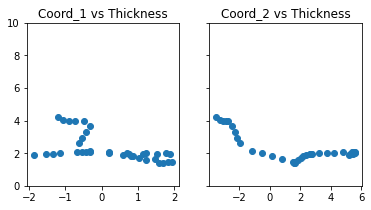

In [35]:
# plot thickness vs coordinates
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(6,3), sharey=True)
ax1.scatter(coord2_floorpts, t)
ax2.scatter(coord1_floorpts,t)
ax1.set_title('Coord_2 vs Thickness')
ax2.set_title('Coord_1 vs Thickness')
plt.ylim(0,10)

In [36]:
counta = sum(1 for i in range(len(indicator_fx_intrusion)) if indicator_fx_intrusion[i] == 1)

intrusion = np.zeros([counta, 7])
j = 0
for n in range(len(indicator_fx_intrusion)):
    if indicator_fx_intrusion[n] == 1:
        intrusion[j,0] = grid_points[n,0] #X coordinate
        intrusion[j,1] = grid_points[n,1] #Y coordinate
        intrusion[j,2] = grid_points[n,2] #Z coordinate
        intrusion[j,3] = coord0_gridpts[n]
        intrusion[j,4] = coord1_gridpts[n]
        intrusion[j,5] = coord2_gridpts[n]
        intrusion[j,6] = indicator_fx_intrusion[n] #intrusion network value, must be 0 
        j = j+1

(0.0, 10.0)

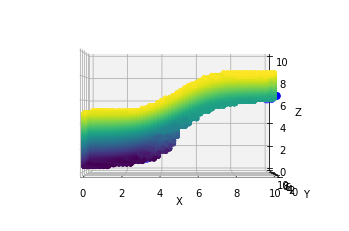

In [37]:
# 3D Visualization of the fields
ax = plt.axes(projection='3d')
# ax.scatter3D(floor_points_vals.loc[:,'X']
ax.scatter3D(floor_points[:,0],floor_points[:,1],floor_points[:,2], c='blue', s=50)
# ax.scatter3D(newp[:,0],newp[:,1],newp[:,2], c='blue', s=50)
ax.scatter3D(intrusion[:,0],intrusion[:,1],intrusion[:,2], c = intrusion[:,3])
ax.view_init(0, -90)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
# plt.savefig('intrusion_0pts_25grid.tiff')